# 1. Gradiente descendiente (15%), estaba en un parque de la ciudad y escuche un ruido constante.

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sounddevice as sd
from IPython.display import Audio
from scipy.io.wavfile import write


<Axes: >

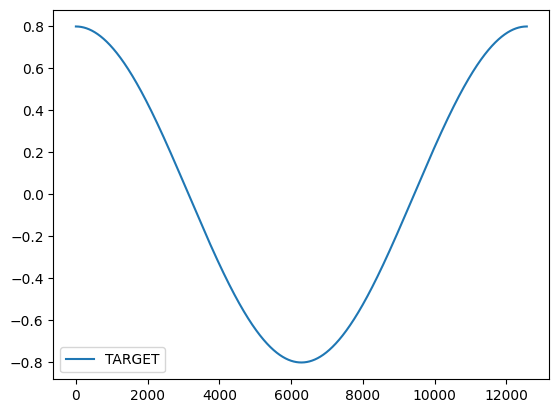

In [3]:
dfTrain = pd.read_csv('./data/train.csv')
xTrain = dfTrain['x'].values
yTrain = dfTrain['TARGET'].values
dfTrain.plot(y='TARGET')

### ● Calcular los gradientes que son las derivadas parciales e iniciar los valores en random 
### ● Iterar por muchos epochs (Muchas iteraciones a los datos) 
### ● Por cada epoch toma un numero de muestras aleatorias, calcula el gradiente y ajusta los valores anteriores utilizando el learning rate. 
### ● Termina cuando el numero de epochs es alcanzado 

Epoch    0 | Error=0.501207 | a=0.3397 | b=0.9253 | c=0.7203
Epoch  500 | Error=0.000566 | a=0.8904 | b=0.4166 | c=0.2643
Epoch 1000 | Error=0.000289 | a=0.8636 | b=0.4367 | c=0.2017
Epoch 1500 | Error=0.000148 | a=0.8445 | b=0.4533 | c=0.1498
Epoch 2000 | Error=0.000109 | a=0.8307 | b=0.4665 | c=0.1081
Epoch 2500 | Error=0.000049 | a=0.8207 | b=0.4761 | c=0.0764


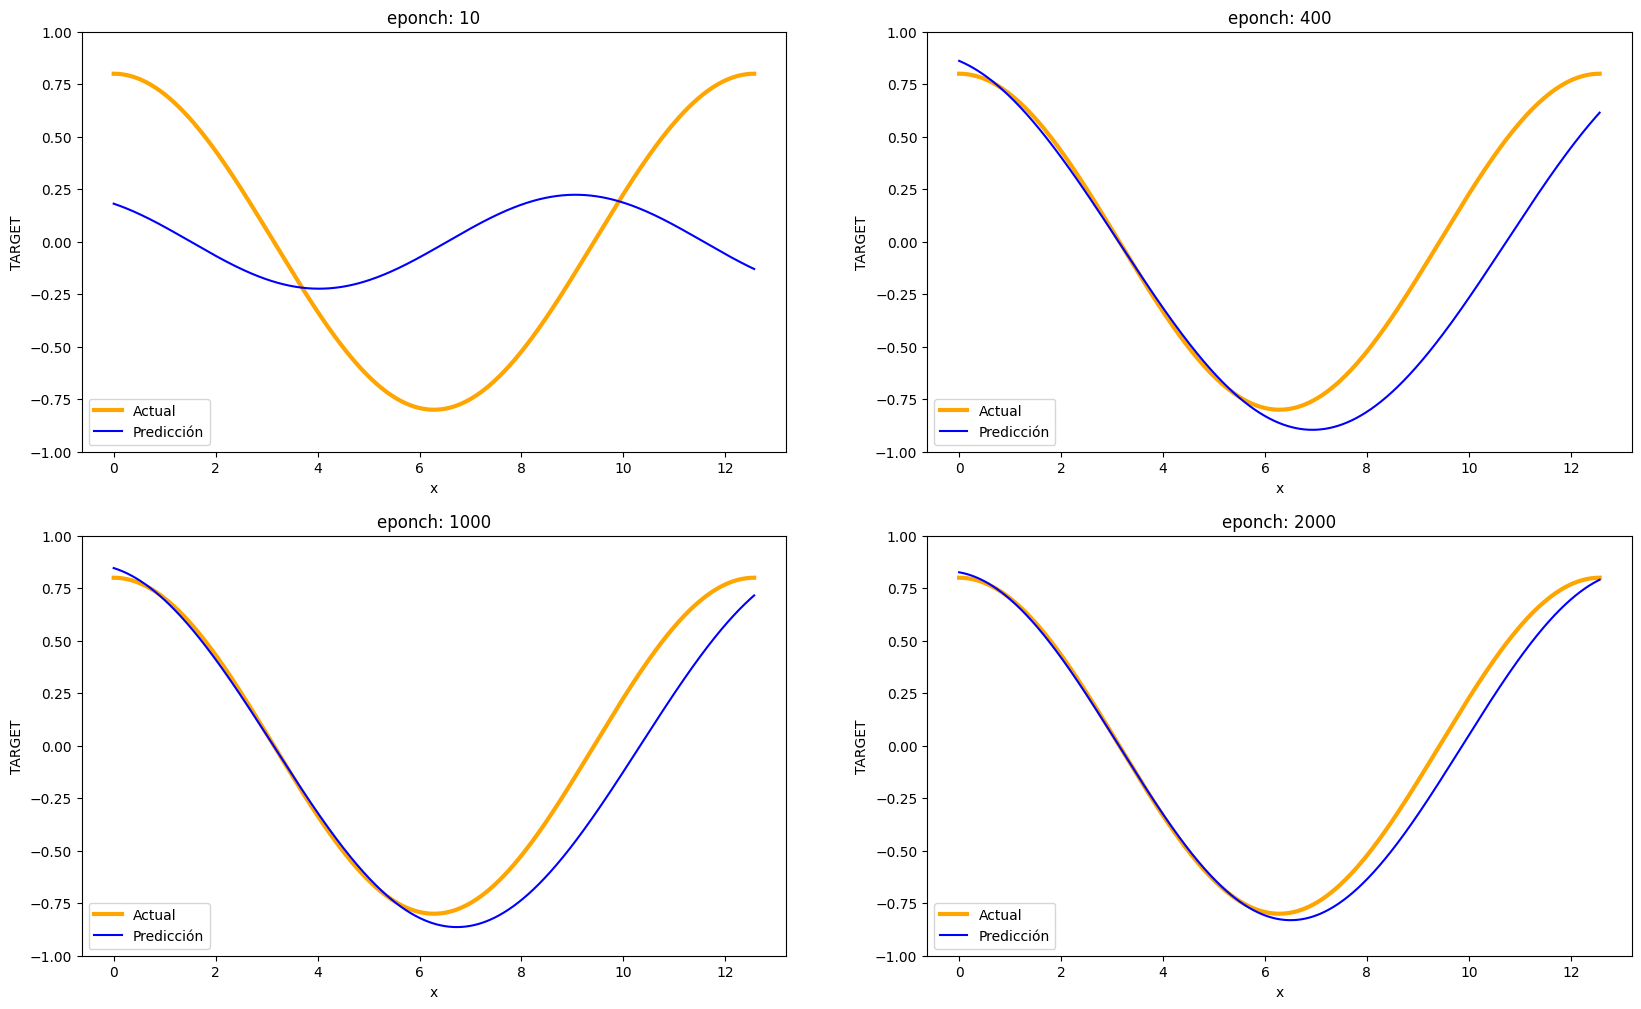

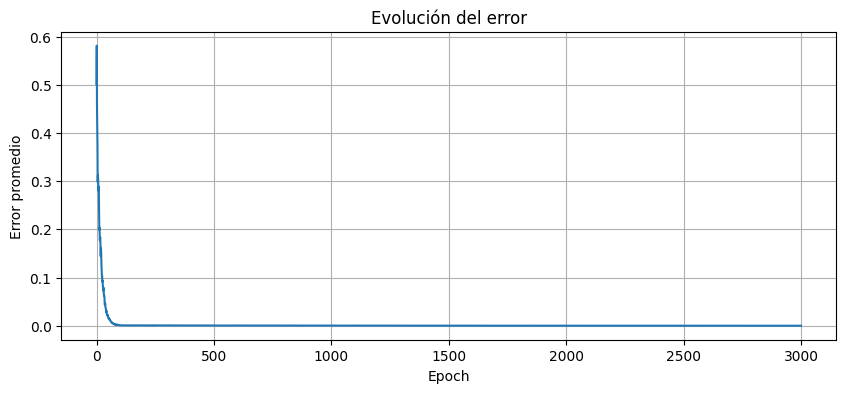

In [6]:
mask = (xTrain >= 0) & (xTrain <= 6.3)
x_convexa = xTrain[mask]
y_convexa = yTrain[mask]

def y_predict(a, b, c, d, x):
    return a * np.cos(b * x + c) + d

def gradientDescent(x, y, epochs=3000, batch_size=100, lr=0.05, d=0):
    np.random.seed(42)
    a, b, c = np.random.rand(3)
    resultados = []
    n = len(x)
    for epoch in range(epochs):
        aGradient = bGradient = cGradient = errorTotal = 0
        for _ in range(batch_size):
            idx = np.random.randint(0, n)
            x_i, y_i = x[idx], y[idx]
            y_pred = y_predict(a, b, c, d, x_i)
            error = y_i - y_pred
            errorTotal += error ** 2
            aGradient += -2 * error * np.cos(b * x_i + c)
            bGradient += 2 * error * a * x_i * np.sin(b * x_i + c)
            cGradient += 2 * error * a * np.sin(b * x_i + c)

        a -= lr * aGradient / batch_size
        b -= lr * bGradient / batch_size
        c -= lr * cGradient / batch_size
        resultados.append([a, b, c, d, errorTotal / batch_size])
        if epoch % 500 == 0:
          print(f"Epoch {epoch:>4} | Error={errorTotal / batch_size:.6f} | "
          f"a={a:.4f} | b={b:.4f} | c={c:.4f}")
    return resultados

resultados = gradientDescent(x_convexa, y_convexa)

def graficarEnRangoCompleto(x_total, y_total, resultados, epochs_list):
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.flatten()
    for i, epoch in enumerate(epochs_list):
        a, b, c, d, _ = resultados[epoch]
        y_pred = y_predict(a, b, c, d, x_total)
        axes[i].plot(x_total, y_total, label='Actual', color='orange', linewidth=3)
        axes[i].plot(x_total, y_pred, label='Predicción', color='blue')
        axes[i].set_title(f'eponch: {epoch}')
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('TARGET')
        axes[i].set_ylim(-1, 1)
        axes[i].legend()

    errores = [r[-1] for r in resultados]
    plt.figure(figsize=(10, 4))
    plt.plot(errores)
    plt.title('Evolución del error')
    plt.xlabel('Epoch')
    plt.ylabel('Error promedio')
    plt.grid(True)
    plt.show()

graficarEnRangoCompleto(xTrain, yTrain, resultados, [10, 400, 1000, 2000])


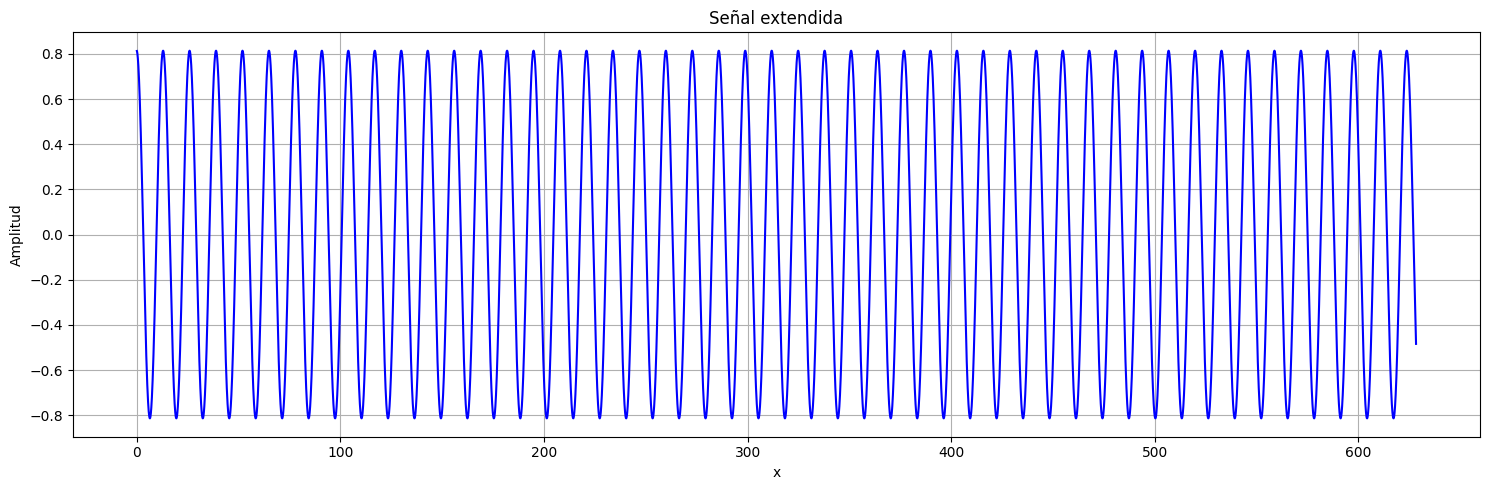

In [47]:
a, b, c, d, _ = resultados[-1]

x_long = np.arange(0, 200 * np.pi, 0.001).astype(np.float32)
long_s = np.array([y_predict(a, b, c, d, xi) for xi in x_long])

plt.figure(figsize=(15, 5))
plt.plot(x_long, long_s, color='blue')
plt.title('Señal extendida')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()

## Generar audio

In [5]:
sd.play(long_s, samplerate=44100)
Audio(long_s, rate=44100)

scaled = np.int16(long_s / np.max(np.abs(long_s)) * 32767)
write('audioGenerado.wav', 44100, scaled)
print("audio generado!")

audio generado!


In [6]:
from IPython.display import Audio
Audio(long_s, rate=44100)

## Generar prediccion del archivo test

In [7]:
test_data = pd.read_csv('./data/test.csv')
x_test = test_data['x'].values
y_test_pred = [y_predict(a, b, c, d, xi) for xi in x_test]

submission = pd.DataFrame({
    'example_id': test_data['example_id'],
    'TARGET': y_test_pred
})
submission.to_csv('resultadop1.csv', index=False)